# 0. Import

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# 1️. Load MNIST dataset

In [2]:
print("Loading MNIST dataset...")
start_time = time.time()

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")  # (70000, 784)
print(f"Labels: {np.unique(y)}")

Loading MNIST dataset...
Dataset shape: (70000, 784)
Labels: [0 1 2 3 4 5 6 7 8 9]


# 2. Split data into train/test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (56000, 784), Test size: (14000, 784)


# 3. Train baseline Random Forest

In [4]:
print("Training baseline Random Forest...")
baseline_start = time.time()

rf_baseline = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1)
rf_baseline.fit(X_train, y_train)

y_pred_baseline = rf_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

baseline_end = time.time()
print(f"Baseline training + prediction time: {baseline_end - baseline_start:.2f} seconds")

Training baseline Random Forest...
Baseline Accuracy: 0.9689
Baseline training + prediction time: 33.14 seconds


# 4. Fine-tune Random Forest using GridSearchCV

In [5]:
print("Fine-tuning Random Forest...")
tune_start = time.time()

param_grid = {
    'n_estimators': [500, 800],
    'max_depth': [None, 60, 80],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

tune_end = time.time()
print(f"Grid search time: {tune_end - tune_start:.2f} seconds")

Fine-tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  56.5s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  56.4s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  56.7s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  57.0s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  57.0s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 1.5min


/home/asyno/PycharmProjects/ML-Examples/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.5min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.4min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.4min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.4min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.5min
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 1.4min
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 1.4min
[CV] END bootstrap=True, max_depth=80, max_featu

# 5. Evaluate Tuned Model

Tuned Test Accuracy: 0.9719

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.97      0.95      0.96      1433
           4       0.97      0.98      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



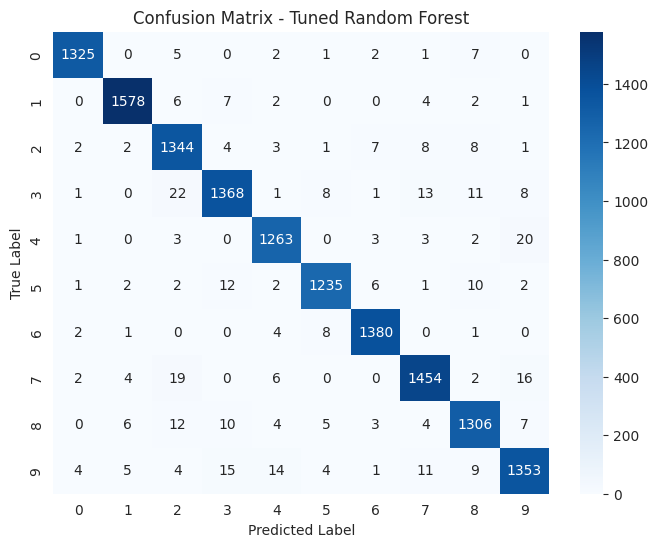

In [6]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print(f"Tuned Test Accuracy: {test_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 6. Example Predictions

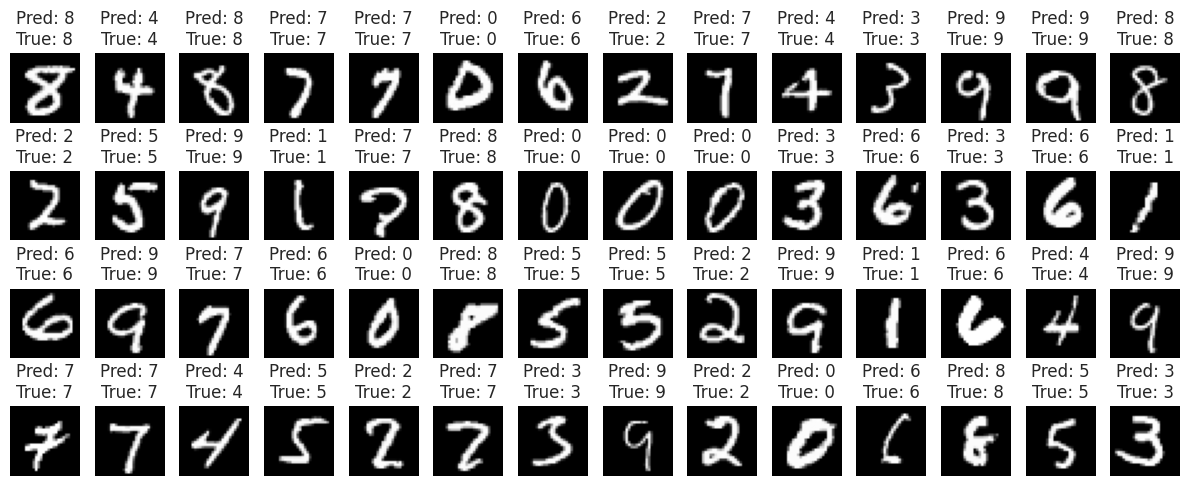

In [7]:
fig, axes = plt.subplots(4, 14, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# 7. Tree Depth Analysis

In [8]:
tree_depths = [estimator.tree_.max_depth for estimator in best_rf.estimators_]
avg_depth = np.mean(tree_depths)
max_depth = np.max(tree_depths)
min_depth = np.min(tree_depths)

print("\n🔍 Tree Depth Analysis:")
print(f"Average tree depth: {avg_depth:.2f}")
print(f"Max tree depth: {max_depth}")
print(f"Min tree depth: {min_depth}")


🔍 Tree Depth Analysis:
Average tree depth: 37.14
Max tree depth: 51
Min tree depth: 27


# 8. Visualize Tree Depth Distribution

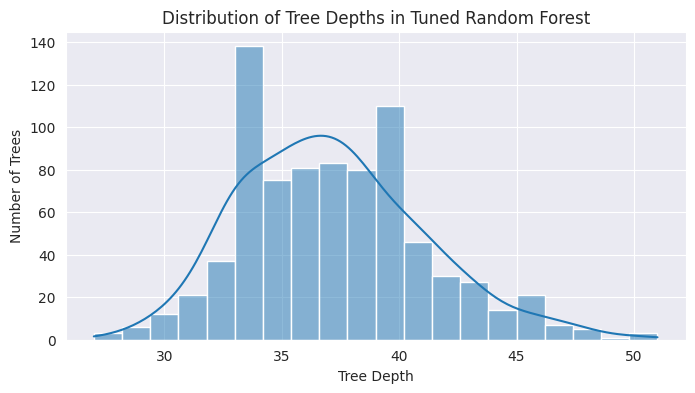

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(tree_depths, bins=20, kde=True)
plt.title("Distribution of Tree Depths in Tuned Random Forest")
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

# 9. Runtime Estimation

In [10]:
total_time = time.time() - start_time

print(f"\nTotal script runtime:\n⏱ {total_time:.2f} seconds")
print(f"\nBaseline Accuracy: {baseline_accuracy:.4f}")
print(f"\nTuned Cross-Validation Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Total script runtime:
⏱ 6511.54 seconds

Baseline Accuracy: 0.9689

Tuned Cross-Validation Accuracy: 0.9719
